In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('SPD_Crime_Data.csv')

In [6]:
df.head(5)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


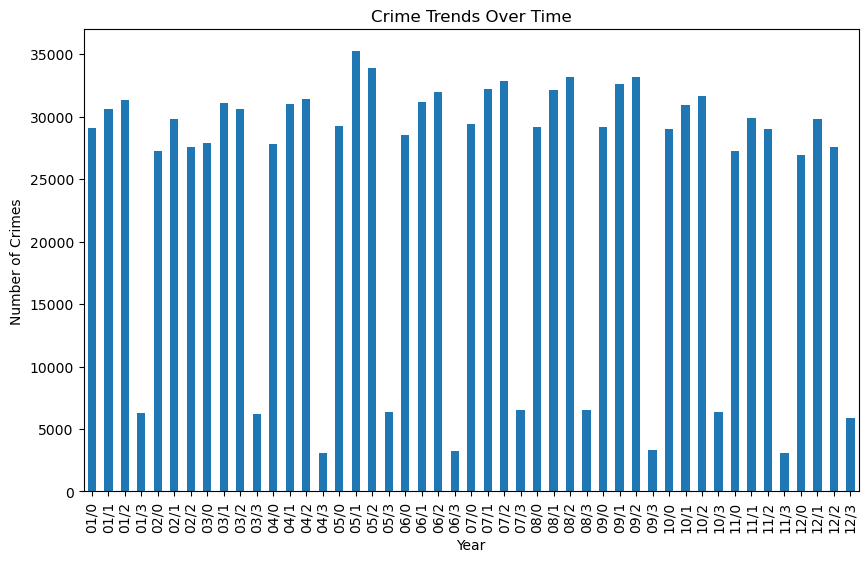

In [7]:
df['Offense Start DateTime'].str[:4].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title('Crime Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

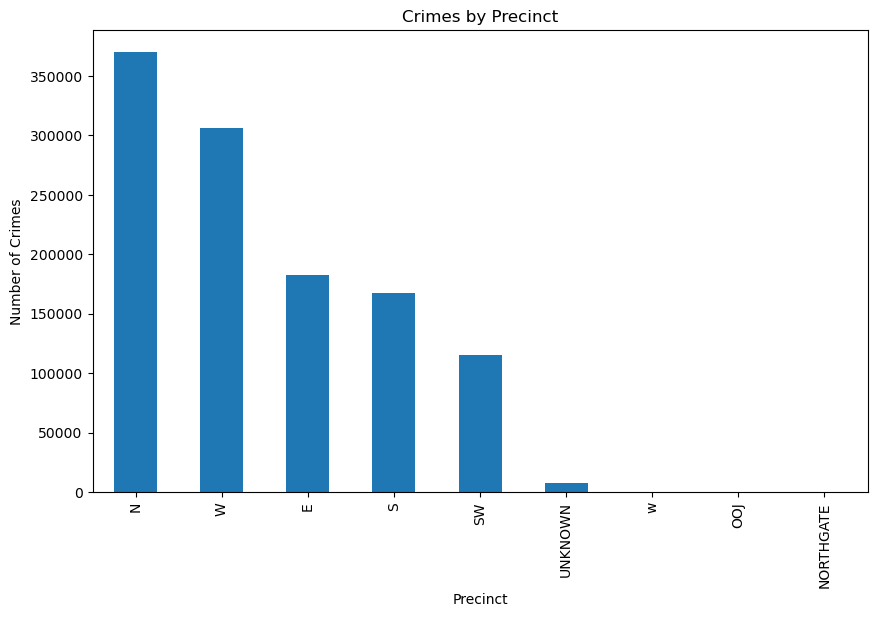

In [8]:
df['Precinct'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Crimes by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Number of Crimes')
plt.show()

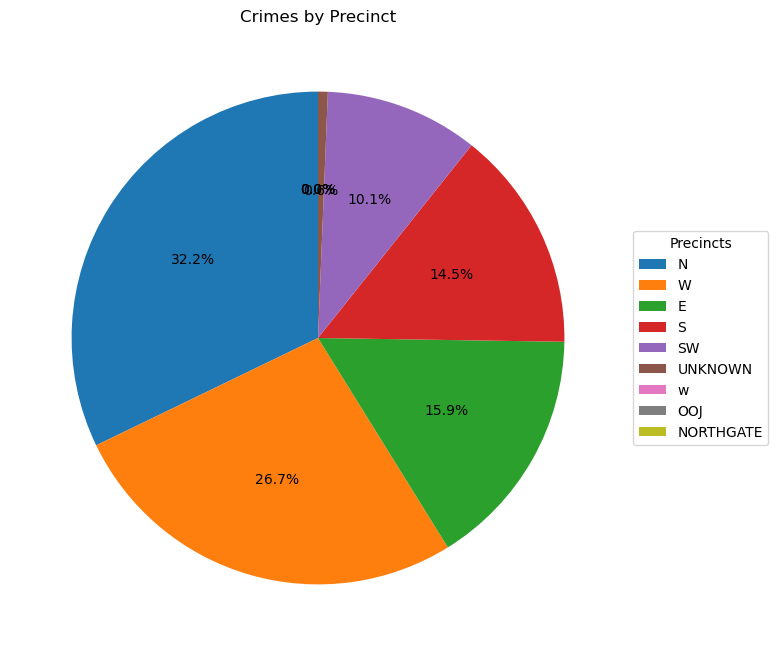

In [11]:

# Load the dataset
df = pd.read_csv('SPD_Crime_Data.csv')

# Get the crime counts by precinct
precinct_counts = df['Precinct'].value_counts()

# Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(precinct_counts, labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with precinct names
plt.legend(precinct_counts.index, title="Precincts", loc="center left", bbox_to_anchor=(1, 0.5))

# Title and display
plt.title('Crimes by Precinct')
plt.show()


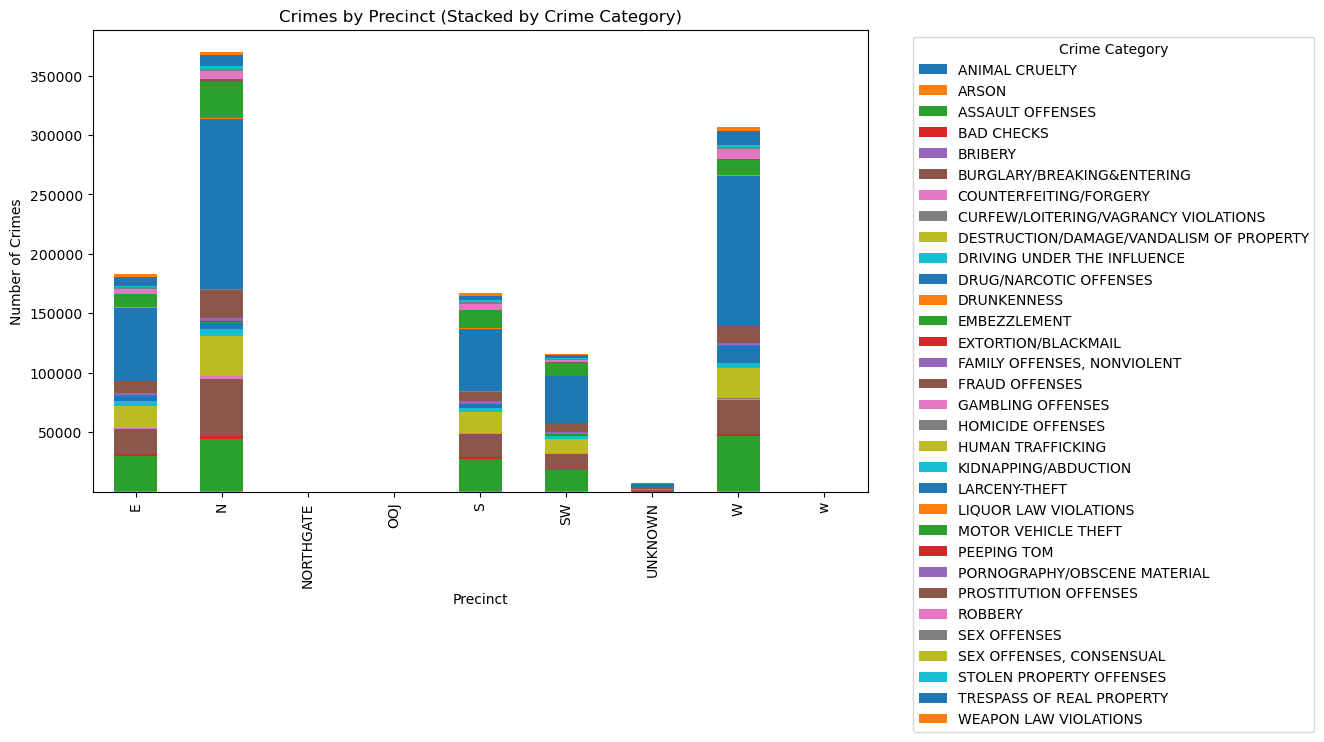

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SPD_Crime_Data.csv')

# Group the data by 'precinct' and 'offense_parent_group', and count the occurrences
crime_by_precinct = df.groupby(['Precinct', 'Offense Parent Group']).size().unstack()

# Plot a stacked bar chart
crime_by_precinct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Crimes by Precinct (Stacked by Crime Category)')
plt.xlabel('Precinct')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


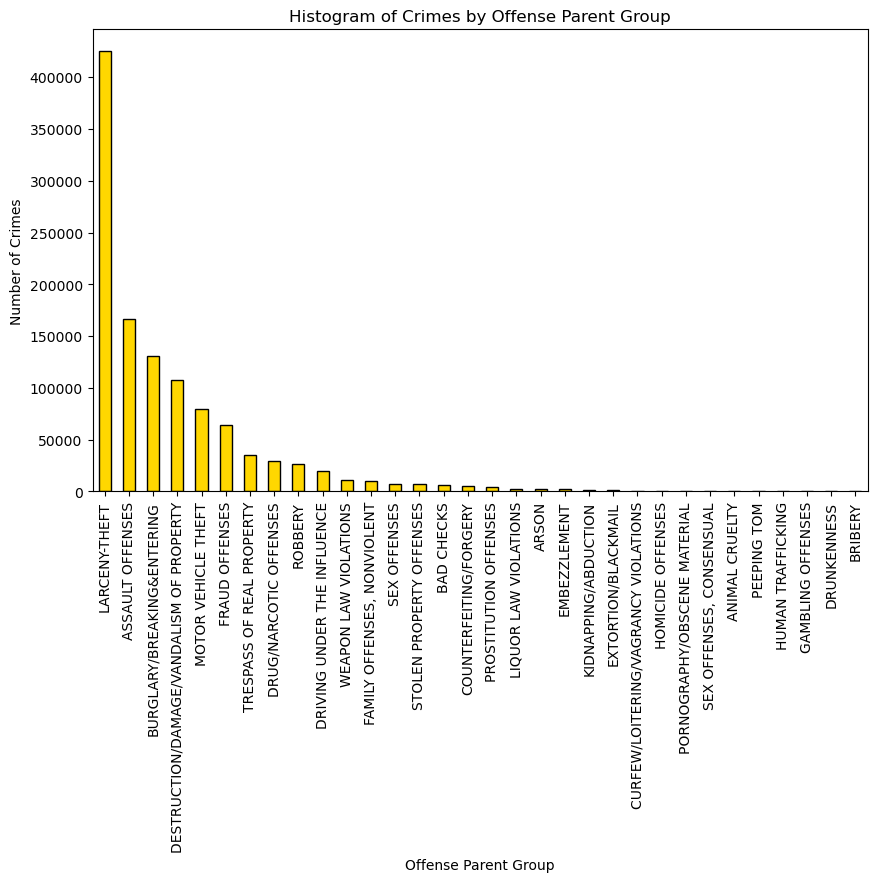

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SPD_Crime_Data.csv')

# Count occurrences of each offense parent group
offense_counts = df['Offense Parent Group'].value_counts()

# Plot a histogram
plt.figure(figsize=(10, 6))
offense_counts.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Histogram of Crimes by Offense Parent Group')
plt.xlabel('Offense Parent Group')
plt.ylabel('Number of Crimes')
#plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.show()


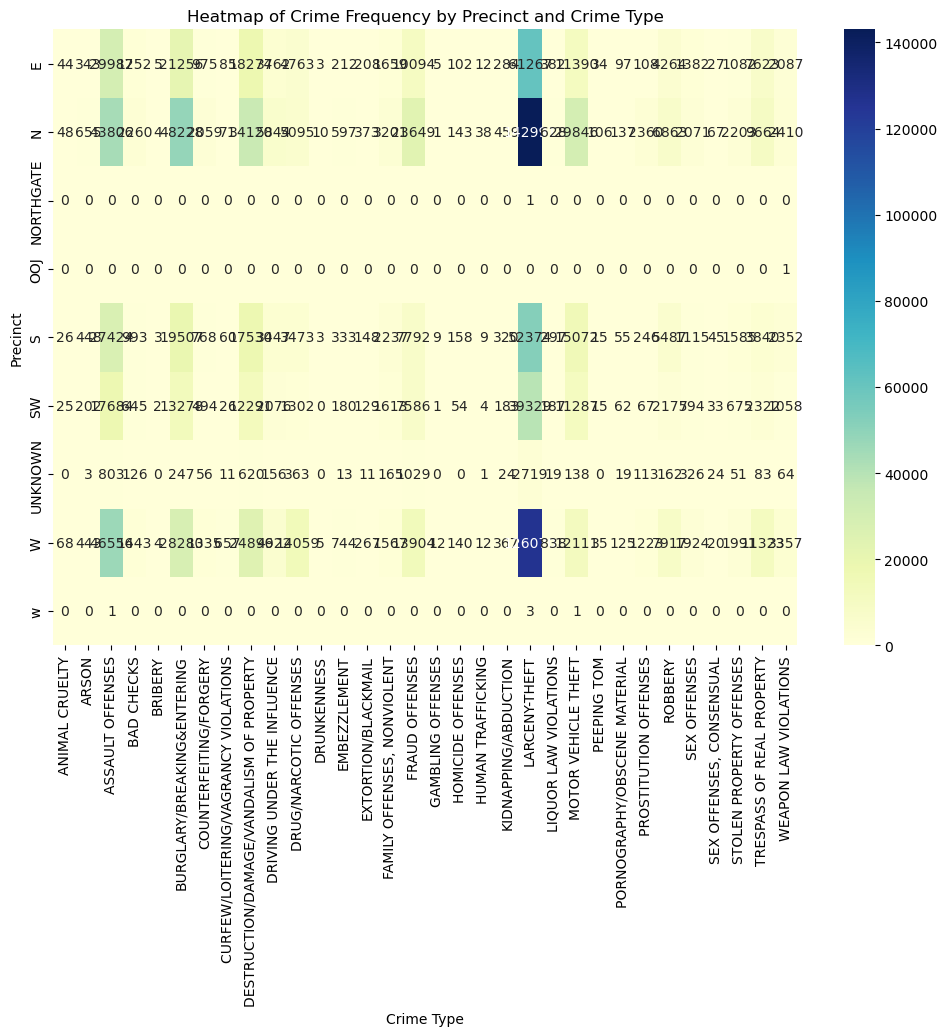

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SPD_Crime_Data.csv')

# Create a pivot table with precincts as rows and offense parent group as columns
crime_heatmap_data = df.pivot_table(index='Precinct', 
                                    columns='Offense Parent Group', 
                                    aggfunc='size', 
                                    fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Crime Frequency by Precinct and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Precinct')
plt.show()


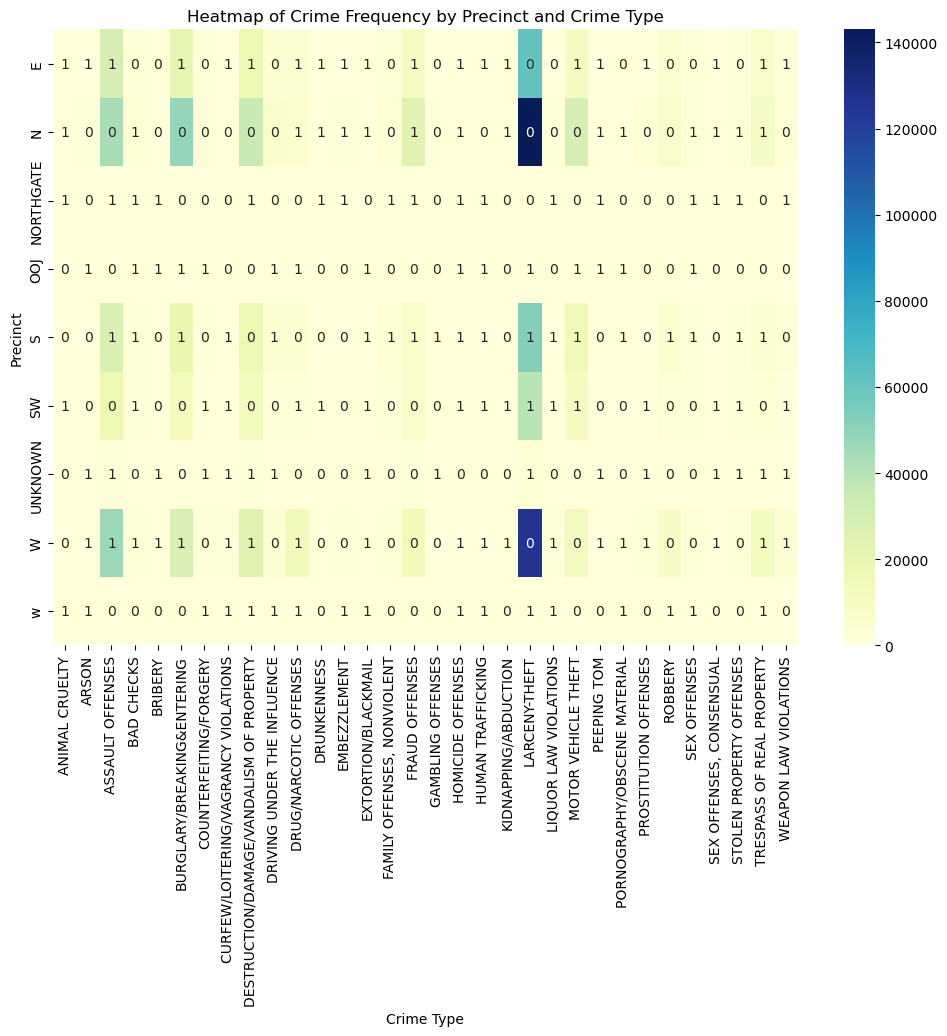

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SPD_Crime_Data.csv')

# Create a pivot table with precincts as rows and offense parent group as columns
crime_heatmap_data = df.pivot_table(index='Precinct', 
                                    columns='Offense Parent Group', 
                                    aggfunc='size', 
                                    fill_value=0)

# Create a mask to hide certain values
# For example, we'll randomly hide 50% of the values
mask = np.random.choice([True, False], size=crime_heatmap_data.shape, p=[0.5, 0.5])

# Plot the heatmap with some values hidden by the mask
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, cmap='YlGnBu', annot=~mask, fmt='d')  # Display values where mask is False
plt.title('Heatmap of Crime Frequency by Precinct and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Precinct')
plt.show()


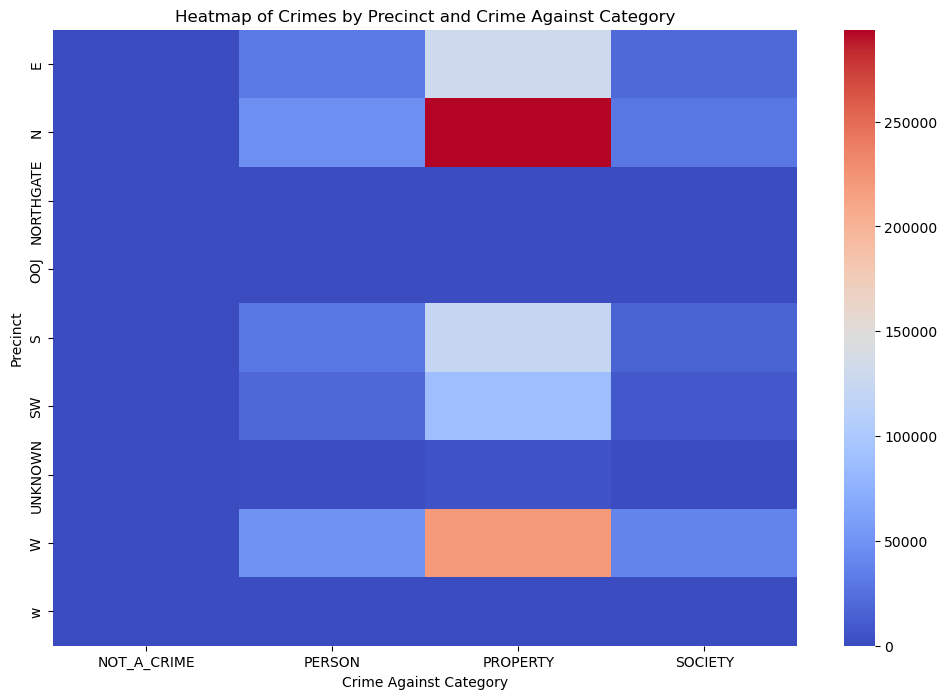

In [19]:
# Heatmap: Precinct vs Crime Against Category
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SPD_Crime_Data.csv')

# Create a pivot table with precincts as rows and crime against category as columns
crime_heatmap_data = df.pivot_table(index='Precinct', 
                                    columns='Crime Against Category', 
                                    aggfunc='size', 
                                    fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, cmap='coolwarm', annot=False)  # Remove annot for clean heatmap
plt.title('Heatmap of Crimes by Precinct and Crime Against Category')
plt.xlabel('Crime Against Category')
plt.ylabel('Precinct')
plt.show()


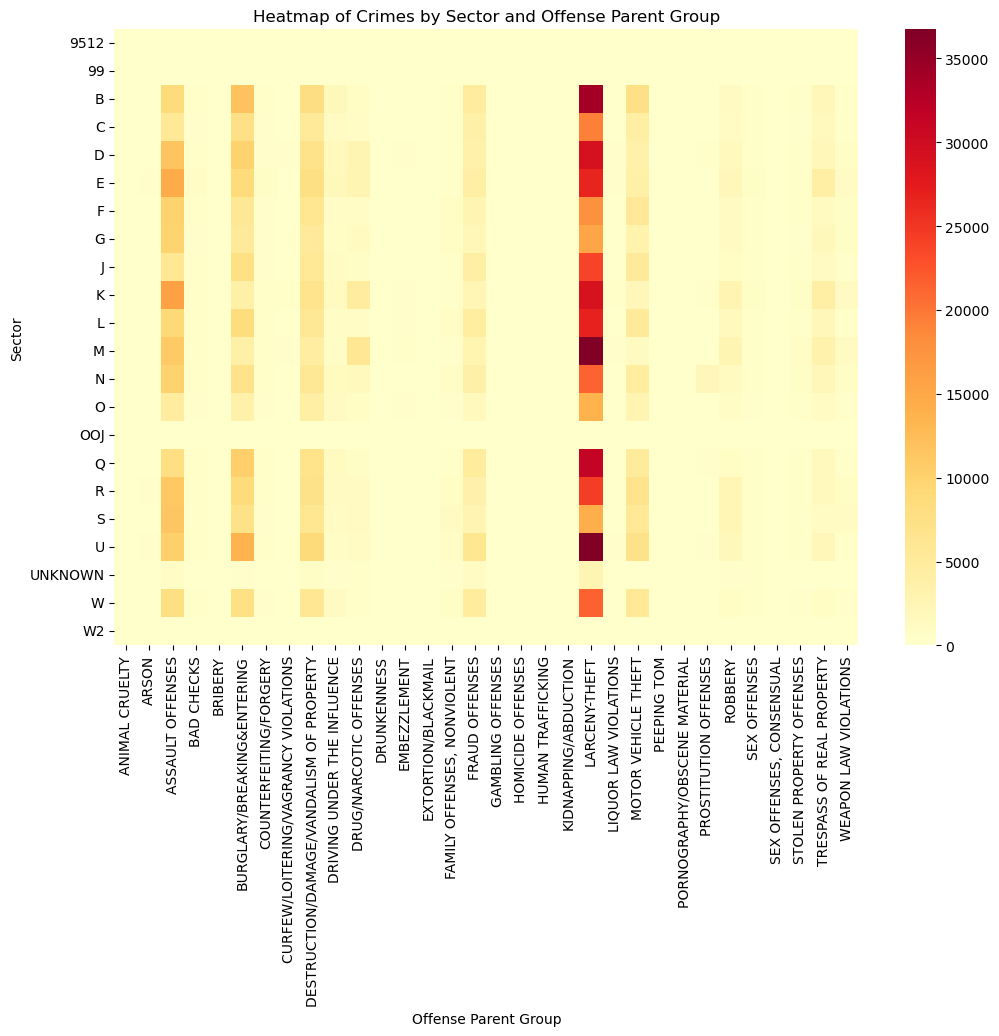

In [20]:
# Heatmap: Sector vs Offense Parent Group
# Create a pivot table with sectors as rows and offense parent group as columns
sector_heatmap_data = df.pivot_table(index='Sector', 
                                     columns='Offense Parent Group', 
                                     aggfunc='size', 
                                     fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sector_heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Heatmap of Crimes by Sector and Offense Parent Group')
plt.xlabel('Offense Parent Group')
plt.ylabel('Sector')
plt.show()


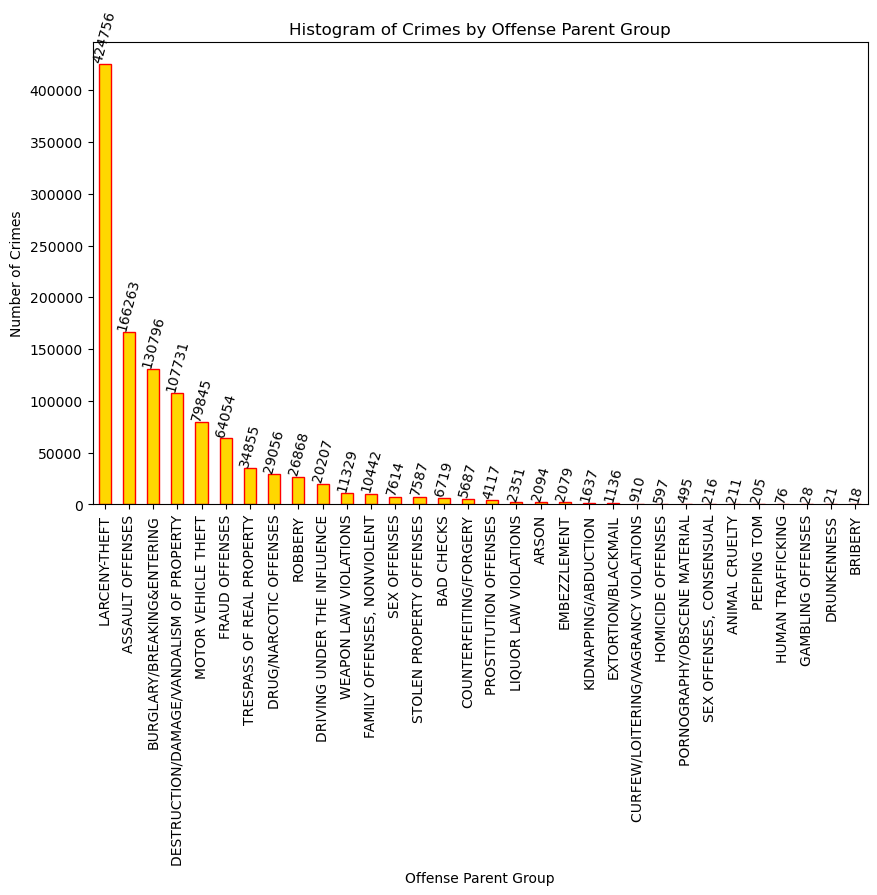

Offense Parent Group
LARCENY-THEFT                               424756
ASSAULT OFFENSES                            166263
BURGLARY/BREAKING&ENTERING                  130796
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY    107731
MOTOR VEHICLE THEFT                          79845
FRAUD OFFENSES                               64054
TRESPASS OF REAL PROPERTY                    34855
DRUG/NARCOTIC OFFENSES                       29056
ROBBERY                                      26868
DRIVING UNDER THE INFLUENCE                  20207
WEAPON LAW VIOLATIONS                        11329
FAMILY OFFENSES, NONVIOLENT                  10442
SEX OFFENSES                                  7614
STOLEN PROPERTY OFFENSES                      7587
BAD CHECKS                                    6719
COUNTERFEITING/FORGERY                        5687
PROSTITUTION OFFENSES                         4117
LIQUOR LAW VIOLATIONS                         2351
ARSON                                         2094
EMBEZZLEME

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SPD_Crime_Data.csv')

# Count occurrences of each offense parent group
offense_counts = df['Offense Parent Group'].value_counts()

# Plot a histogram
plt.figure(figsize=(10, 6))
bars = offense_counts.plot(kind='bar', color='gold', edgecolor='red')

# Add the value of each bar above the bar, with values displayed vertically
for idx, value in enumerate(offense_counts):
    plt.text(idx, value + 10, str(value), ha='center', va='bottom', rotation=75)

plt.title('Histogram of Crimes by Offense Parent Group')
plt.xlabel('Offense Parent Group')
plt.ylabel('Number of Crimes')
# plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.show()

# Print the offense counts to see the exact values
print(offense_counts)
